In [2]:
!pip install sympy

  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/d2/05/e6600db80270777c4a64238a98d442f0fd07cc8915be2a1c16da7f2b9e74/sympy-1.12-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath>=0.19 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 5.7/5.7 MB 9.7 MB/s eta 0:00:00
   --------------------------------------- 536.2/536.2 kB 11.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
dfc = pd.read_csv("D:/proyeto cripto/tradingbot/cristian/scrips/by1h/BTCUSDT")
dfc  

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [11]:
dft = pd.read_csv(f'C:/Users/tinma/OneDrive/Escritorio/tradingbot/csvs/historical/by1h/BTCUSDT')
dft  

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [12]:
try:
    if type(dfc) == pd.core.frame.DataFrame:
        df = dfc
except:
        df = dft

In [13]:
df

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [14]:
df.Tiempo = df.Tiempo.astype('datetime64')

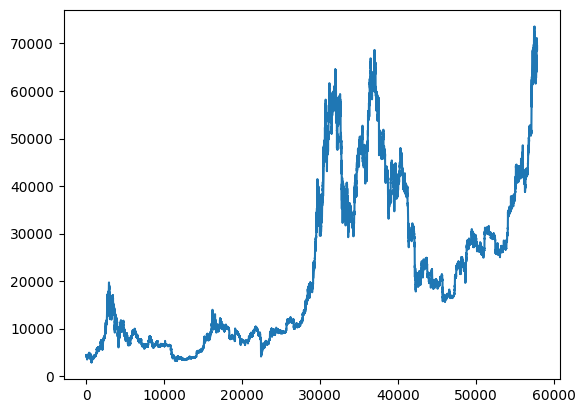

In [15]:
import matplotlib.pyplot as plt
plt.plot(df.Open)

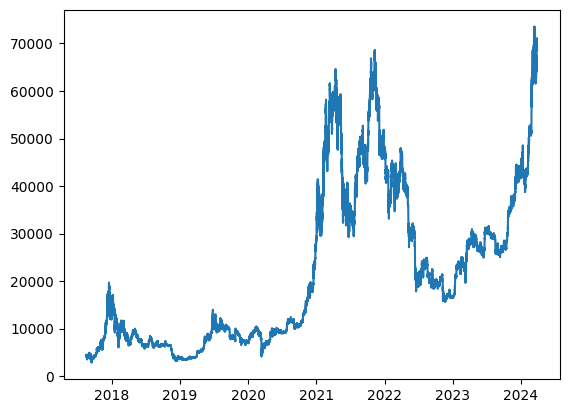

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.Tiempo,df.Open)

# Análisis de Derivadas
#### Análisis de la temporalidad de 1 hora.

In [65]:
metadf = df.SD_Interpolacion.multiply(300)/df.PD_Interpolacion
metadf

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
57823    1.679140
57824    1.672000
57825    1.664923
57826    1.657911
57827    1.650961
Length: 57828, dtype: float64

In [66]:
metadf.mean()

-2.6698974705784386

In [16]:
df['Interpolacion'] = sc.signal.savgol_filter(df.Open,1500,3)
df['Primer_Derivada'] = df.Interpolacion.diff()
df['PD_Interpolacion'] = sc.signal.savgol_filter(df.Primer_Derivada,1500,3)
df['Segunda_Derivada'] = df.PD_Interpolacion.diff()
df['SD_Interpolacion'] = sc.signal.savgol_filter(df.Segunda_Derivada,1500,3)
df['DIF_Derivadas'] = (df.SD_Interpolacion.multiply(300) - df.PD_Interpolacion)
df

,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Primer_Derivada,PD_Interpolacion,Segunda_Derivada,SD_Interpolacion,DIF_Derivadas
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,4023.392451,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,4026.192954,2.800503,NaN,NaN,NaN,NaN
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,4028.980025,2.787071,NaN,NaN,NaN,NaN
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,4031.753688,2.773663,NaN,NaN,NaN,NaN
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,4034.513965,2.760277,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370,65717.251744,-30.094050,-32.245542,-0.183256,-0.180483,-21.899246
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970,65686.997047,-30.254697,-32.429094,-0.183553,-0.180738,-21.792338
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870,65656.581504,-30.415543,-32.612943,-0.183849,-0.180994,-21.685112
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180,65626.004914,-30.576590,-32.797089,-0.184145,-0.181249,-21.577567


In [68]:
print(df.PD_Interpolacion, df.SD_Interpolacion.multiply(200))

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
57823   -32.245542
57824   -32.429094
57825   -32.612943
57826   -32.797089
57827   -32.981531
Name: PD_Interpolacion, Length: 57828, dtype: float64 0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
57823   -36.096525
57824   -36.147622
57825   -36.198703
57826   -36.249770
57827   -36.300823
Name: SD_Interpolacion, Length: 57828, dtype: float64


In [17]:
# Fechas de los Halvings anteriores: 28 de Noviembre de 2012, 9 de Julio de 2016, 11 de Mayo de 2020, 20 de Abril de 2024

halving_dates = ['28-11-2012','9-7-2016','11-5-2020','20-4-2024']
j = 0
for i in halving_dates:
    d = datetime.strptime(i, "%d-%m-%Y")
    halving_dates[j] = d
    j += 1
halving_dates = pd.DataFrame(halving_dates,columns=['Halving_Dates'])
halving_dates

# dft.Tiempo[dft.Tiempo]

,Halving_Dates
0,2012-11-28
1,2016-07-09
2,2020-05-11
3,2024-04-20


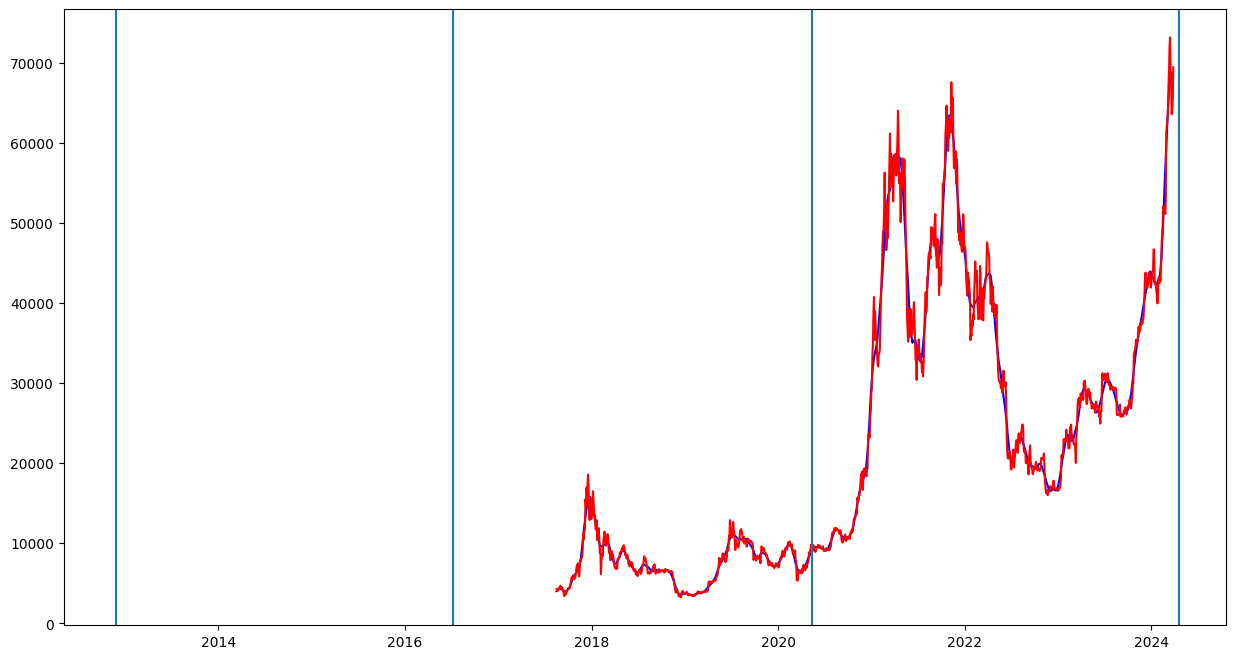

In [18]:
plt.figure(figsize=(15,8))
plt.plot(df.Tiempo[::150],df.Interpolacion[::150],color='blue')
plt.plot(df.Tiempo[::50],df.Open[::50],color='red')
for i in halving_dates['Halving_Dates']:
    plt.axvline(i)
plt.show()

### Gráfica de la primera y segunda derivada utilizando el precio

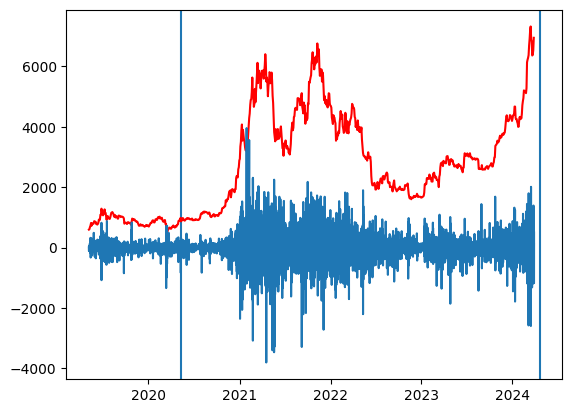

In [41]:
a = 15000
b = 60000
plt.axvline(halving_dates['Halving_Dates'][2])
plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot(df.Tiempo[a:b:50],df.Open[a:b:50].multiply(0.1),color='red')
plt.plot(df.Tiempo[a:b],df.Open[a:b].diff())
# plt.plot(df.Tiempo[a:b],df.Open[a:b].diff().diff().multiply(1))

### Gráfica de la primera y segunda derivada utilizando el suavizado por medio de métodos de Fourier

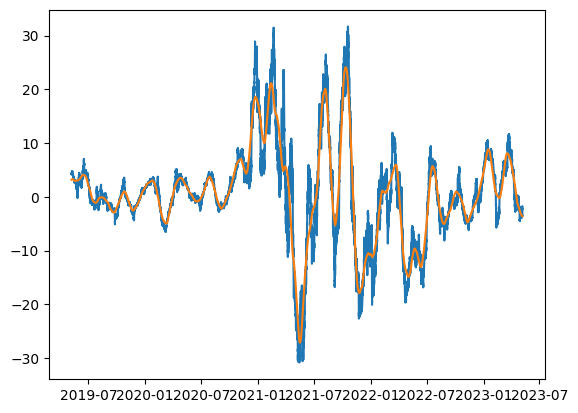

In [14]:
# Primera derivada, utilizando los datos del suavizado de Fourier en la primer derivada. Daría lo mismo si derivo primero y después suavizo.

a = 15000
b = 50000
plt.plot(df.Tiempo[a:b],df.Primer_Derivada[a:b])
plt.plot(df.Tiempo[a:b],df.PD_Interpolacion[a:b].multiply(1))

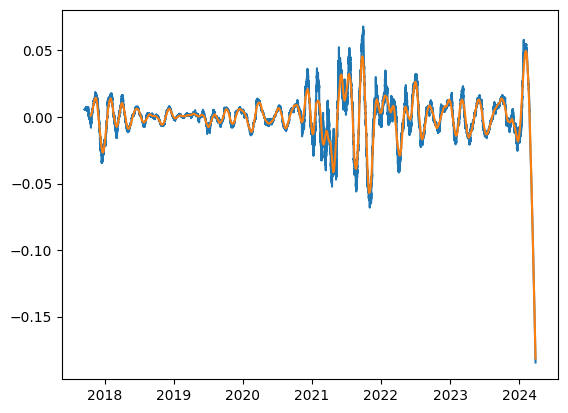

In [15]:
# Segunda derivada, utilizando los datos del suavizado de Fourier en la primer derivada. Daría lo mismo si derivo primero y después suavizo.
a = 15000
b = 60000
plt.plot(df.Tiempo,df.Segunda_Derivada)
plt.plot(df.Tiempo,df.SD_Interpolacion)

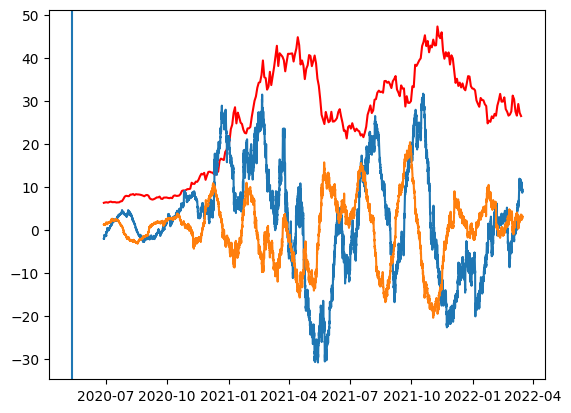

In [16]:
a = 25000
b = 40000
plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot(df.Tiempo[a:b:50],df.Open[a:b:50].multiply(0.0007),color='red')
plt.plot(df.Tiempo[a:b],df.Primer_Derivada[a:b])
plt.plot(df.Tiempo[a:b],df.Segunda_Derivada[a:b].multiply(300))

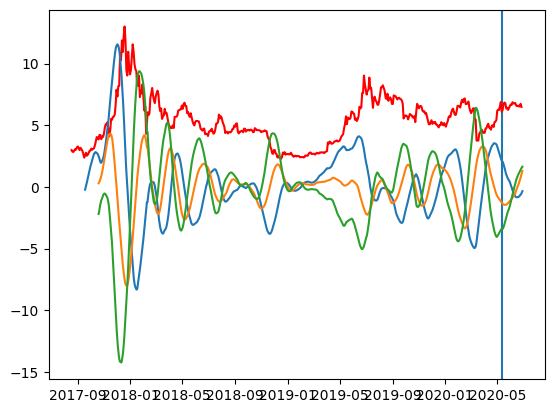

In [78]:
a = 0
b = 25000
plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot(df.Tiempo[a:b:50],df.Open[a:b:50].multiply(0.0007),color='red')
plt.plot(df.Tiempo[a:b],df.PD_Interpolacion[a:b])
plt.plot(df.Tiempo[a:b],df.SD_Interpolacion[a:b].multiply(300))
plt.plot(df.Tiempo[a:b],df.DIF_Derivadas[a:b].multiply(1))

# Análisis de Derivadas
#### Análisis de la temporalidad de 1 minuto.

In [19]:
try:
        df = pd.read_csv("D:/proyeto cripto/tradingbot/cristian/scrips/by1m/BTCUSDT")
except:
        df = pd.read_csv(f'C:/Users/tinma/OneDrive/Escritorio/tradingbot/csvs/historical/by1m/BTCUSDT')
df.Tiempo = df.Tiempo.astype('datetime64')
df['Interpolacion'] = sc.signal.savgol_filter(df.Open,60,3)
df['Primer_Derivada'] = df.Interpolacion.diff()
df['PD_Interpolacion'] = sc.signal.savgol_filter(df.Primer_Derivada,60,3)
df['Segunda_Derivada'] = df.PD_Interpolacion.diff()
df['SD_Interpolacion'] = sc.signal.savgol_filter(df.Segunda_Derivada,60,3)
df   # 3m 43.7s

,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Primer_Derivada,PD_Interpolacion,Segunda_Derivada,SD_Interpolacion
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,4271.047868,NaN,NaN,NaN,NaN
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,4268.749601,-2.298267,NaN,NaN,NaN
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,4266.702550,-2.047051,NaN,NaN,NaN
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,4264.898830,-1.803719,NaN,NaN,NaN
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,4263.330558,-1.568273,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3473177,2024-03-31 02:09:00,69992.10,69992.10,69992.09,69992.10,1.172140,70024.478426,-1.728802,-1.695423,-0.381510,-0.379483
3473178,2024-03-31 02:10:00,69992.10,70019.39,69992.09,70019.38,7.438230,70022.436432,-2.041993,-2.106177,-0.410753,-0.409831
3473179,2024-03-31 02:11:00,70019.38,70085.98,70019.38,70082.00,14.504680,70020.069423,-2.367009,-2.547142,-0.440965,-0.441444
3473180,2024-03-31 02:12:00,70081.99,70116.24,70081.99,70113.39,18.548410,70017.365573,-2.703850,-3.019286,-0.472144,-0.474340


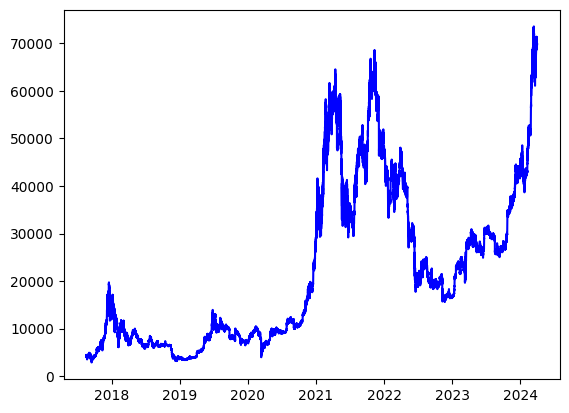

In [20]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 125 datos para el suavizado con exponencial cúbica.

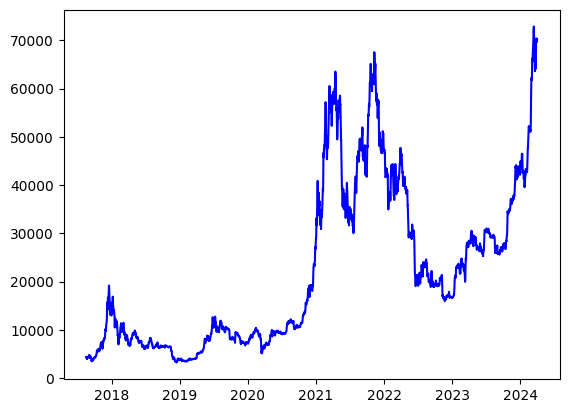

In [157]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 5,000 datos para el suavizado con exponencial cúbica.

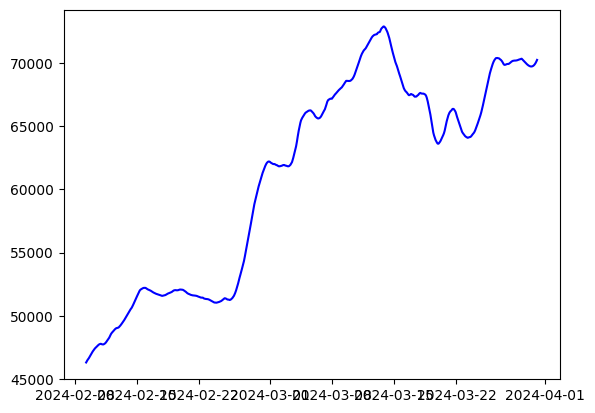

In [166]:
plt.plot(df.Tiempo[3400000::],df.Interpolacion[3400000::],color='blue')  

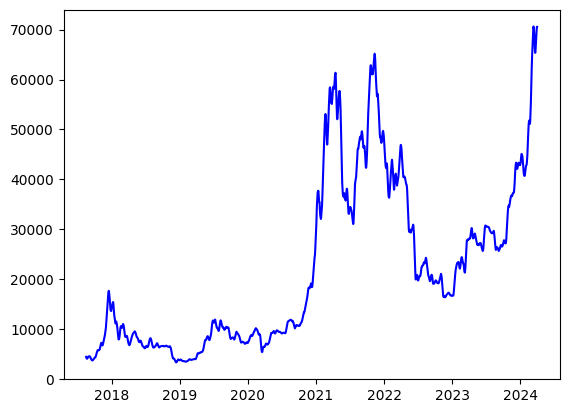

In [151]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 25,000 datos para el suavizado con exponencial cúbica.

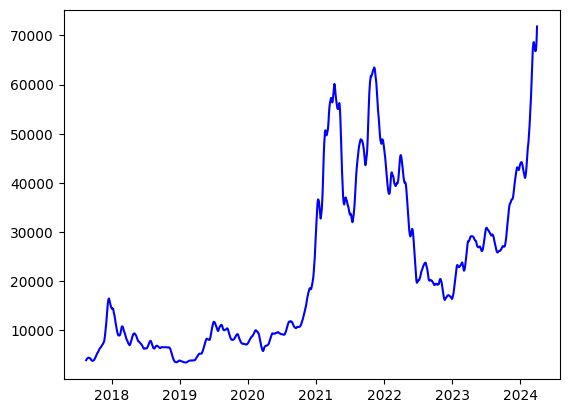

In [153]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 50,000 datos para el suavizado con exponencial cúbica.

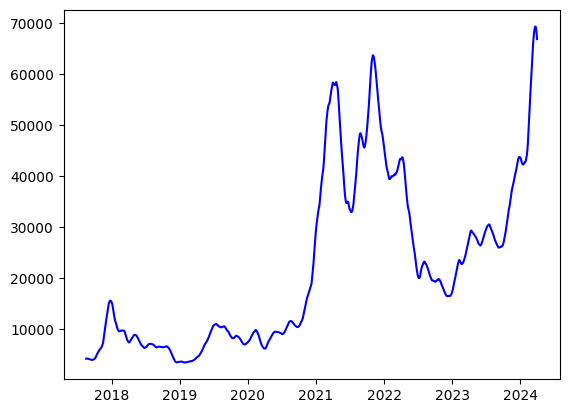

In [155]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 100,000 datos para el suavizado con exponencial cúbica.

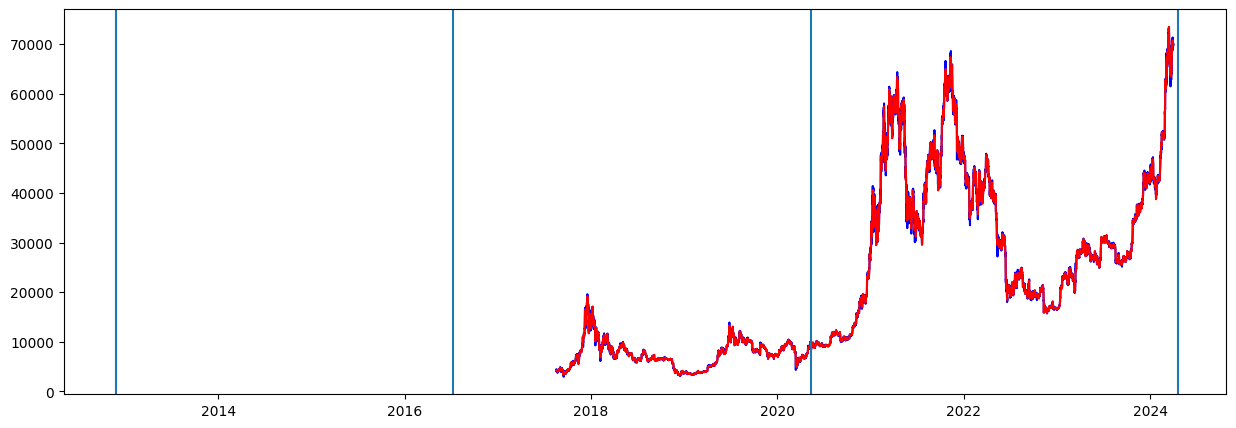

In [251]:
plt.figure(figsize=(15,5))
plt.plot(df.Tiempo[::150],df.Interpolacion[::150],color='blue')
plt.plot(df.Tiempo[::1000],df.Open[::1000],color='red')
for i in halving_dates['Halving_Dates']:
    plt.axvline(i);
plt.show()

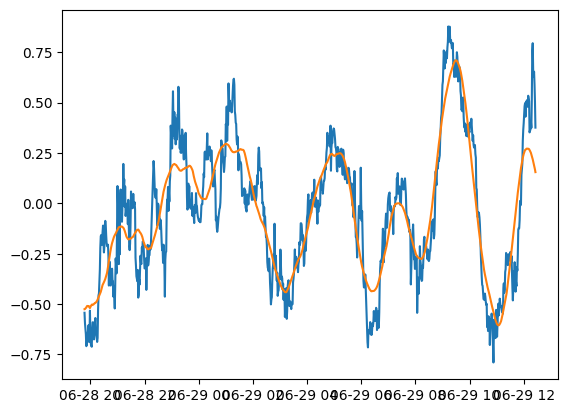

In [81]:
# Primera derivada, utilizando los datos del suavizado de Fourier en la primer derivada. Daría lo mismo si derivo primero y después suavizo.

a = 0
b = 1000
d = 1500000
plt.plot(df.Tiempo[a+d:b+d],df.Primer_Derivada[a+d:b+d])
plt.plot(df.Tiempo[a+d:b+d],df.PD_Interpolacion[a+d:b+d].multiply(1))

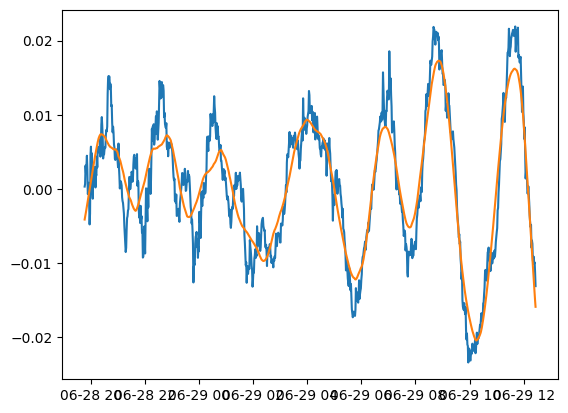

In [82]:
# Segunda derivada, utilizando los datos del suavizado de Fourier en la primer derivada. Daría lo mismo si derivo primero y después suavizo.

a = 0
b = 1000
d = 1500000
plt.plot(df.Tiempo[a+d:b+d],df.Segunda_Derivada[a+d:b+d])
plt.plot(df.Tiempo[a+d:b+d],df.SD_Interpolacion[a+d:b+d])

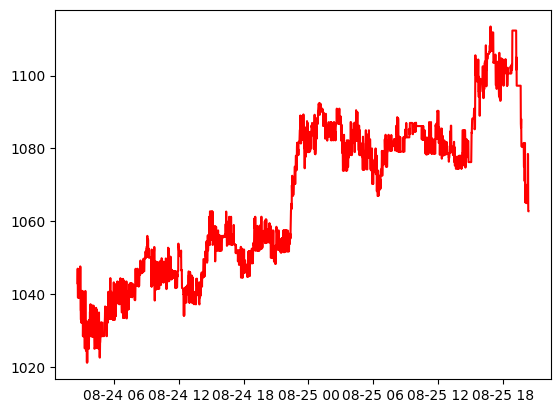

In [94]:
a = 10000
d = 2500
plt.plot(df.Tiempo[a:a+d],df.Open[a:a+d].multiply(0.25),color='red')

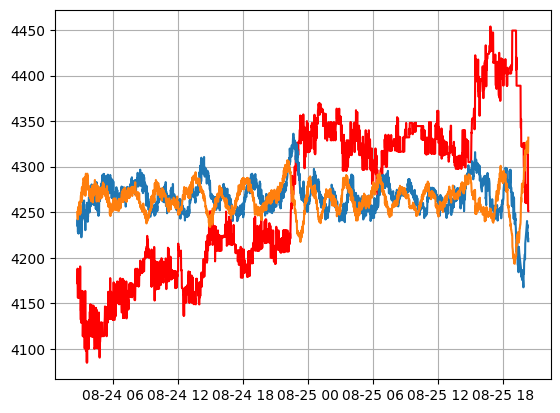

In [161]:
a = 10000
d = 2500
mp = df.Open[a:a+d].mean()
# plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot(df.Tiempo[a:a+d],df.Open[a:a+d].multiply(1),color='red')
plt.plot(df.Tiempo[a:a+d],df.Primer_Derivada[a:a+d].multiply(30)+mp)
plt.plot(df.Tiempo[a:a+d],df.Segunda_Derivada[a:a+d].multiply(1000)+mp)
plt.grid(visible=True)

In [23]:
d = datetime.strptime("21-02-2021 18:46:00", "%d-%m-%Y %H:%M:%S")

<function matplotlib.pyplot.show(close=None, block=None)>

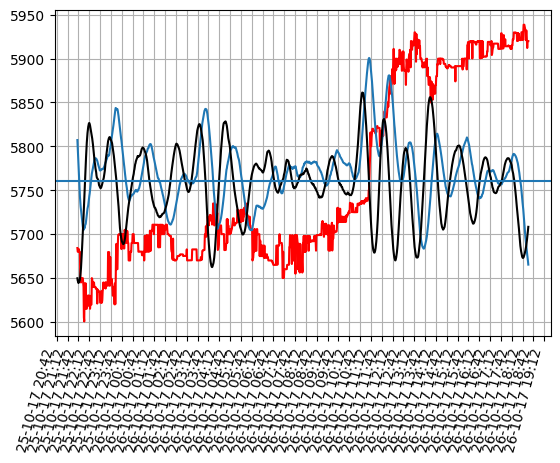

In [21]:
a = 100000
d = 1250
mp = df.Open[a:a+d].mean()
# plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot()
plt.plot(df.Tiempo[a:a+d],df.Open[a:a+d].multiply(1),color='red')
plt.plot(df.Tiempo[a:a+d],df.PD_Interpolacion[a:a+d].multiply(50)+mp)
plt.plot(df.Tiempo[a:a+d],df.SD_Interpolacion[a:a+d].multiply(1000)+mp,color='k')
plt.grid(visible=True)

# Set minor tick locations.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
# plt.gca().xaxis.set_minor_locator(minorLocator)
plt.gcf().autofmt_xdate()
# Set grid to use minor tick locations. 
plt.grid(which = 'minor')
plt.xticks(rotation=75)
plt.axhline(mp)
plt.show

In [33]:
recent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4321 entries, 2024-04-01 01:31:00 to 2024-04-04 01:31:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4321 non-null   float64
 1   High    4321 non-null   float64
 2   Low     4321 non-null   float64
 3   Close   4321 non-null   float64
 4   Volume  4321 non-null   float64
dtypes: float64(5)
memory usage: 202.5 KB


In [3]:

## Conexión con Binance para descargar la lista de pares que binance maneja
from binance import Client
client = Client()

recent_data = df = pd.DataFrame(client.get_historical_klines('BTCUSDT','1m','5 days ago UTC'))
recent_data = recent_data.iloc[:,:6]
recent_data.columns = ['Tiempo','Open','High','Low','Close','Volume']
recent_data['Tiempo'] = pd.to_datetime(recent_data.Tiempo,unit='ms')
recent_data['Tiempo'] = recent_data.Tiempo.astype('datetime64')
recent_data = recent_data.set_index('Tiempo')
recent_data = recent_data.astype(float)
recent_data = recent_data.reset_index()
recent_data['Interpolacion'] = sc.signal.savgol_filter(recent_data.Open,60,3)
recent_data['Primer_Derivada'] = recent_data.Interpolacion.diff()
recent_data['PD_Interpolacion'] = sc.signal.savgol_filter(recent_data.Primer_Derivada,60,3)
recent_data['Segunda_Derivada'] = recent_data.PD_Interpolacion.diff()
recent_data['SD_Interpolacion'] = sc.signal.savgol_filter(recent_data.Segunda_Derivada,60,3)
recent_data 

C:\Users\tinma\AppData\Local\Temp\ipykernel_12308\1843588005.py:9: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  recent_data['Tiempo'] = recent_data.Tiempo.astype('datetime64')


,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Primer_Derivada,PD_Interpolacion,Segunda_Derivada,SD_Interpolacion
0,2024-03-30 01:58:00,69990.07,69990.08,69976.07,69976.08,5.13394,70001.873001,NaN,NaN,NaN,NaN
1,2024-03-30 01:59:00,69976.08,69976.08,69976.07,69976.07,5.93851,69992.631544,-9.241457,NaN,NaN,NaN
2,2024-03-30 02:00:00,69976.08,70010.00,69976.07,70009.99,13.20123,69984.069101,-8.562444,NaN,NaN,NaN
3,2024-03-30 02:01:00,70009.99,70010.00,69960.00,69994.97,17.30435,69976.162752,-7.906349,NaN,NaN,NaN
4,2024-03-30 02:02:00,69994.97,69994.98,69950.00,69952.01,14.21367,69968.889580,-7.273172,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7196,2024-04-04 01:54:00,66087.79,66136.40,66087.79,66136.40,10.19406,66108.305141,4.470525,4.345676,0.969222,0.968247
7197,2024-04-04 01:55:00,66136.39,66154.00,66136.15,66142.93,4.30108,66113.716942,5.411801,5.373362,1.027686,1.024341
7198,2024-04-04 01:56:00,66142.93,66176.00,66142.92,66176.00,11.09730,66120.108022,6.391079,6.460844,1.087482,1.081421
7199,2024-04-04 01:57:00,66176.00,66199.99,66160.00,66198.72,9.33291,66127.516380,7.408359,7.609454,1.148610,1.139470


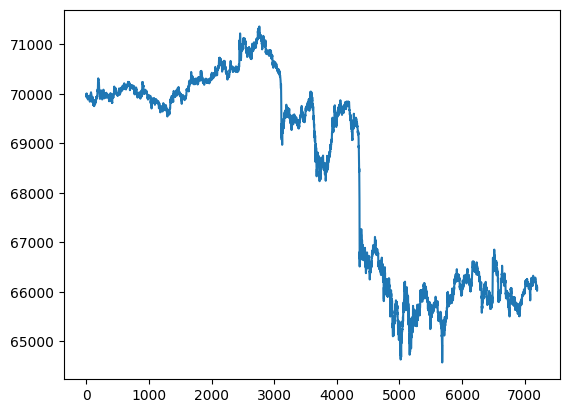

In [4]:
plt.plot(recent_data.Open)

<function matplotlib.pyplot.show(close=None, block=None)>

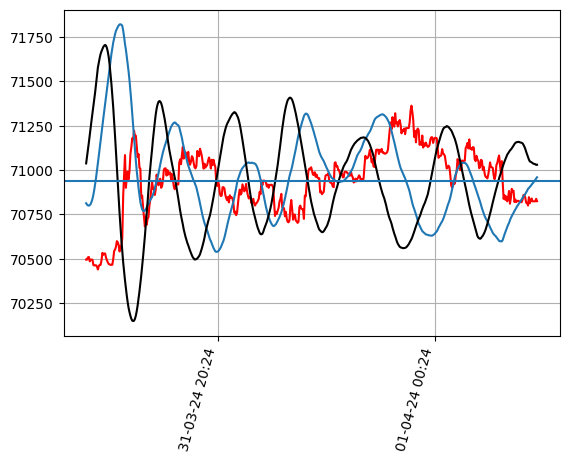

In [4]:
a = 2400
d = 500
mp = recent_data.Open[a:a+d].mean()
# plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot()
plt.plot(recent_data.Tiempo[a:a+d],recent_data.Open[a:a+d].multiply(1),color='red')
plt.plot(recent_data.Tiempo[a:a+d],recent_data.PD_Interpolacion[a:a+d].multiply(50)+mp)
plt.plot(recent_data.Tiempo[a:a+d],recent_data.SD_Interpolacion[a:a+d].multiply(1000)+mp,color='k')
plt.grid(visible=True)

# Set minor tick locations.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=240))
# plt.gca().xaxis.set_minor_locator(minorLocator)
plt.gcf().autofmt_xdate()
# Set grid to use minor tick locations. 
plt.grid(which = 'minor')
plt.xticks(rotation=75)
plt.axhline(mp)
plt.show

# Análisis de Fourier

c:\Users\tinma\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


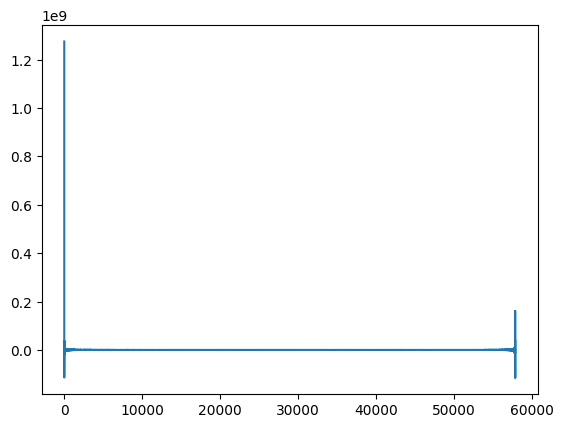

In [19]:
# from .fft import fft, fftfreq

yf = sc.fft.fft(dft.Open.to_numpy())
dft['Fourier_Freq'] = yf

plt.plot(dft.Fourier_Freq)


In [1]:
plt.plot(dft.Fourier_Freq[:15])

NameError: name 'plt' is not defined

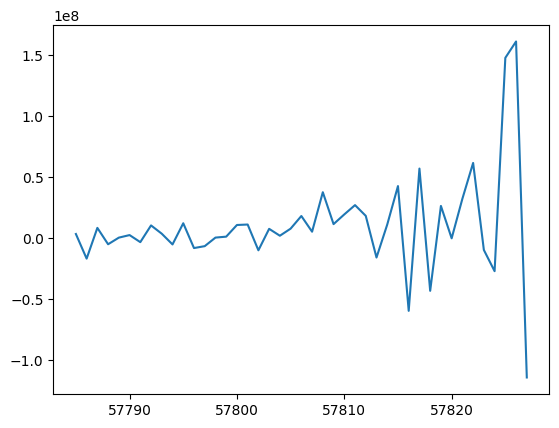

In [32]:
plt.plot(dft.Fourier_Freq[57785:])